# Байесовская статистика
## Задание BS.4


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

---

**Баллы за задание:**

* Задача 1 &mdash; 15 баллов
* Задача 2 &mdash; 40 баллов
* Задача 3 &mdash; 20 баллов
* Задача 4 &mdash; 30 баллов
* Задача 5 &mdash; 70 баллов
---

In [1]:
import numpy as np
import pymc as pm
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

from functools import partial
from tqdm import tqdm

In [3]:
# Bot check

# HW_ID: ds_bs4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

__________________
### Задача 1.

Рассмотрим равномерное распределение на $A \subset \mathbb{R}^2$. Множество $A$ показано на рисунке закрашенными областями. Опишите процесс генерации выборки из этого распределения по схеме Гиббса или покажите, что это невозможно.

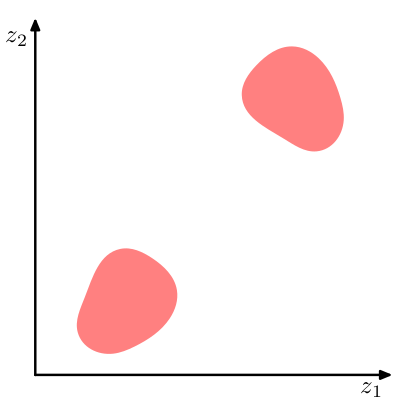

Формально мы можем проводить генерацию по схеме Гиббса, все величины будут определены. Однако, мы всегда будем оставаться в одной компоненте связности, и схема Гиббса не сойдется к настоящему равномерному распределению на всем $A$. 

Итак, пусть $(z_1^{t}, z_2^{t})$ принадлежит одной из двух клякс, $p$ искомое равномерное распределение

Имеем $z_1^{t+1} \sim p( z_1 | z_2 = z_2^{t})$ откуда точки $(z_1^{t}, z_2^{t}),  (z_1^{t+1}, z_2^{t})$ будут лежать на одной горизонтальной прямой, причем обе будут находиться в кляксах => в одной кляксе (так как такие сечения, как видно из картинки, содержат не более одной из клякс) => за пределы кляксы не вышли

Аналогично имеем $z_2^{t+1} \sim p( z_2 | z_1 = z_1^{t+1})$ откуда мы не вышли за пределы вертикальной прямой и остались в кляксах => такое сечение может пересекать только одну из клякс => за пределы кляксы не вышли

Что и требовалось.

---
### Задача 2.

Дано распределение на $\mathbb{R}^2$ с плотностью
$$p(x, y) = c\:\frac{\left|\sin(x+y)\right|\:\exp\left(-\left.|x|\right/10+\cos y\right)}{1+\left.|xy|\right/10},$$

где $c\in \mathbb{R}_+$ &mdash; некоторое число.

Сгенерируйте из него выборку размера $n=2000$ с помощью
* метода Rejection sampling,
* схемы Метрополиса-Хастингса.

В каждом случае нарисуйте ядерную оценку плотности полученной выборки и сравните ее с истинной плотностью.

<font color="red"><b>Замечания:</b></font>
    
1. Вместо $\mathbb{R}^2$ можно рассматривать только квадрат $[-10, 10]^2$.
2. Учтите, что схема Метрополиса-Хастингса требует настройки цепи на начальных итерациях, то есть около 1000 первых итераций необходимо отбросить. Кроме того, если требуется сгенерировать именно выборку, в которой элементы независимы, из полученной траектории стоит брать каждый $k$-й элемент, где $k$ хотя бы 10.
3. При сравнении методов учтите, что метод Rejection sampling может отвергать точки, в то время как в схеме Метрополиса-Хастингса точка добавляется на каждой итерации (повторяется или берется новая).
4. Процедуры семплирования необходимо реализовать самостоятельно.

По сгенерированной выборке оцените для данного распределения математическое ожидание и матрицу ковариаций.

In [18]:
def p(x, y):
    return np.abs(np.sin(x + y)) * np.exp(-np.abs(x)/10 + np.cos(y)) / (1 + np.abs(x*y)/10)

Оценим сверху $c$ (будем интегрировать только по части $\mathbb R^2$)

In [19]:
x_vals = np.linspace(-10, 10, 100)
y_vals = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_vals, y_vals)
integral_value = np.sum(p(X, Y)) * (x_vals[1] - x_vals[0]) * (y_vals[1] - y_vals[0])

c = 1 / integral_value
print(f"Оценка сверху на c = {c:.4f}")

Оценка сверху на c = 0.0102


Получить верхнюю оценку оценку на $p$ очень просто:

$$p(x, y) \leq c \frac{1 \cdot \exp(1)}{1} = c$$

Для Rejection sampling будем мажорировать равномерным распределением на искомом квадрате (соотвественно с плотностью $\frac{1}{400}$)

Итого имеем $$p(x, y) \leq 400 \cdot 0.1 \cdot q(x, y)$$
где $q$ задает равномерное распределение на квадрате $[-10, 10]^2$. Сгенерим методом Rejection sampling:

In [76]:
sample = []
sample_size = 2000
n_generated = 0
while len(sample) < sample_size:
    n_generated += 1
    x = np.random.uniform(-10, 10)
    y = np.random.uniform(-10, 10)
    u = np.random.rand()
    if u < 10 * p(x, y):
        sample.append([x, y])

sample_rs = np.array(sample)
print(f"R-s: {n_generated} генераций, доля принятия = {sample_size/n_generated:.3f}")

R-s: 2746 генераций, доля принятия = 0.728


Осталось реализовать процедуру Метрополиса-Хастинга. Будем генерить новое состояние так:
$$q(x' | x) \sim N(x, \sigma^2)$$
$$q(x | x') \sim N(x', \sigma^2)$$

тогда они сократятся в подсчете $\alpha$ (в плотности будет квадрат разности $x'$ и $x$)

In [77]:
sample = []
burn_iter = sample_size * 5
prev = np.array([0, 0])
n_accept = 0

while len(sample) < burn_iter + sample_size * 10:
    cur = prev + np.random.normal(scale=1, size=2)

    # сразу реджект по alpha - мы смотрим на квадрат
    if np.any(np.abs(cur) > 10):
        sample.append(cur)
        continue
        
    alpha = min(1.0, p(cur[0], cur[1]) / p(prev[0], prev[1])) if p(prev[0], prev[1]) != 0 else 1
    if np.random.rand() < alpha:
        prev = cur
        n_accept += 1
    sample.append(cur)

sample_mh = np.array(sample[burn_iter::10])
print(f"M-h: {burn_iter + sample_size * 10} генераций, доля принятия = {n_accept/len(sample):.3f}")

M-h: 30000 генераций, доля принятия = 0.596


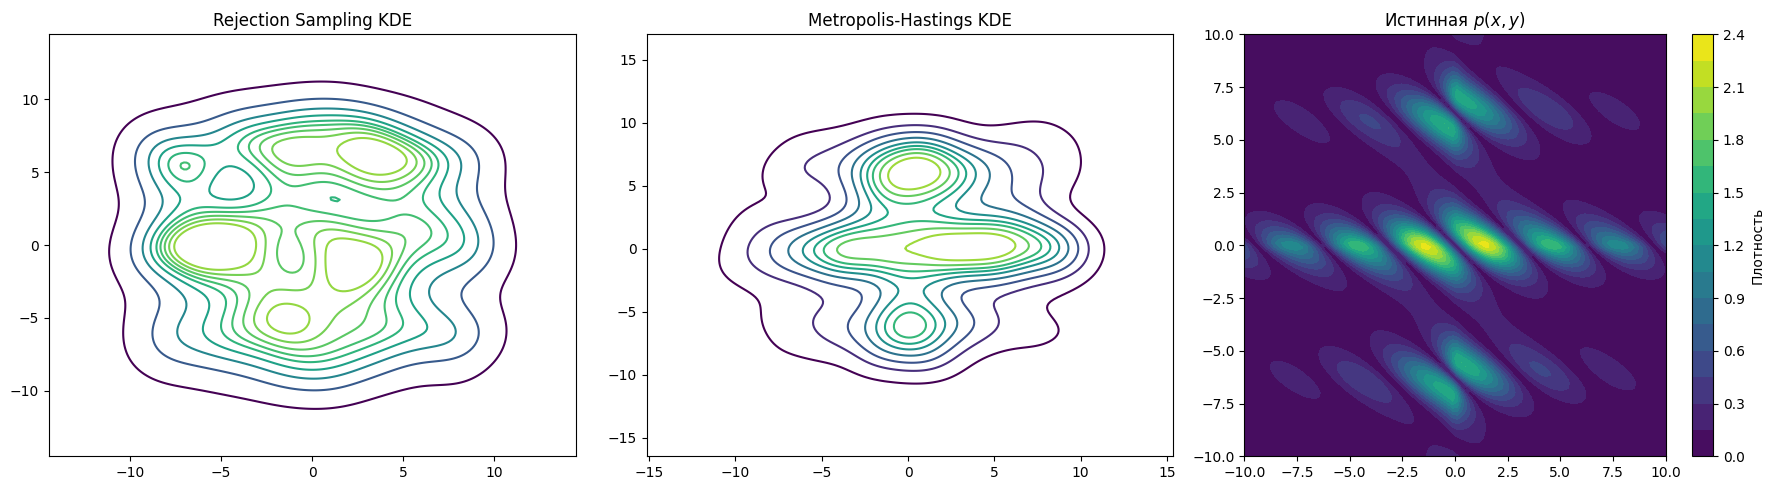

In [80]:
x_grid = np.linspace(-10, 10, 100)
y_grid = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_grid, y_grid)
real = p(X, Y)

plt.figure(figsize=(18, 5))

plt.subplot(131)
sns.kdeplot(x=sample_rs[:,0], y=sample_rs[:,1], cmap='viridis')
plt.title('Rejection Sampling KDE')

plt.subplot(132)
sns.kdeplot(x=sample_mh[:,0], y=sample_mh[:,1], cmap='viridis')
plt.title('Metropolis-Hastings KDE')

plt.subplot(133)
plt.contourf(X, Y, real, levels=20, cmap='viridis')
plt.colorbar(label='Плотность')
plt.title('Истинная $p(x, y)$')
plt.tight_layout()
plt.show()

Все таки оба метода отстают сильно от истинной плотности -> нужно больше элементов выборки

В Metropolis-Hastings больше прослеживается структура, чем в Rejection Sampling - первый фокусируется на нескольких ямках, не обследуя все пространство, а второй метод распределяется случайно по разным ямкам.

Оценим матожидания и корреляции

In [84]:
mean_rs = sample_rs.mean(axis=0)
cov_rs = np.cov(sample_rs.T)
print("Метод Rejection sampling:")
print("Математическое ожидание:", mean_rs)
print("Ковариационная матрица:\n", cov_rs)

mean_mh = sample_mh.mean(axis=0)
cov_mh = np.cov(sample_mh.T)
print("\nМетод Metropolis-Hastings:")
print("Математическое ожидание:", mean_mh)
print("Ковариационная матрица:\n", cov_mh)

Метод Rejection sampling:
Математическое ожидание: [-0.10603357  0.15965243]
Ковариационная матрица:
 [[27.72372531 -0.15569193]
 [-0.15569193 28.2595847 ]]

Метод Metropolis-Hastings:
Математическое ожидание: [0.66716572 0.5910779 ]
Ковариационная матрица:
 [[19.47710762  1.3641282 ]
 [ 1.3641282  21.93631163]]


Как и ожидалось, в Metropolis-Hastings выше автокорреляции и есть смещенность по матожиданию, тогда как Rejection sampling концентрируется случайно.

Говоря еще о выводе по задаче, Rejection sampling потребовал меньше шагов генерации и оказался быстрее - за счет хорошей подгонки параметра $c$ и оценки сверху

Metropolis-Hastings -> цепь может локализоваться и не пройти по всему пространству

Rejection sampling -> обследует весь квадрат

---
### Задача 3.

Для описанных ниже задач опишите математическую модель, постройте ее с помощью PyMC и ответьте на вопросы, используя семплирование.

1. Будем считать, что количество забитых голов некоторой команды в футбольном матче имеет пуассоновское распределение с параметром $\lambda$. На этот параметр задано априорное распределение $\Gamma(1.4, 1)$.

  За первый матч команде удалось забить 4 гола. Оцените апостериорный параметр $\lambda$. Какова вероятность того, что в следующем матче голов будет не меньше?

Имеем

$$p(\lambda|x) \sim p(x|\lambda) p(\lambda)$$

где $p(x|\lambda)$ пуассоновкое с $\lambda$, $p(\lambda) \sim apriori$

Как знаем из свойств переход в сопряженное распределение идет как $G(x + a, beta + 1)$

Задаем априорное распределение, как в условии, затем, зная элемент выборки из условия, считаем апостериорное

In [35]:
sample = np.array([4])
alpha = 1.4
beta = 1

with pm.Model() as model:
    lambda_ = pm.Gamma('Lambda', alpha=alpha, beta=beta)
    
    X = pm.Poisson('X', mu=lambda_, observed=sample)
    
    # Семплирование из апостериорного распределения
    trace = pm.sample(1000, tune=500, cores=4)


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Lambda]


Output()

Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 2 seconds.


Статистики

In [36]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Lambda,2.699,1.17,0.713,4.808,0.027,0.019,1666.0,2163.0,1.0


Для разных цепей - все ок

array([[<Axes: title={'center': 'Lambda'}>,
        <Axes: title={'center': 'Lambda'}>]], dtype=object)

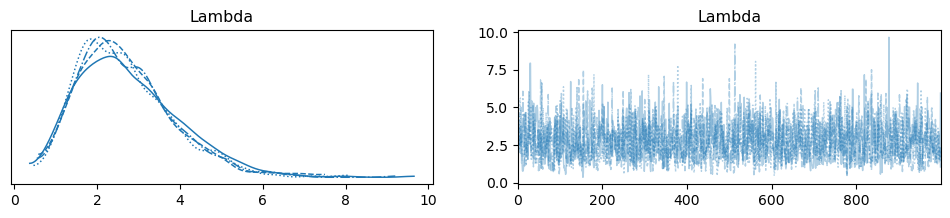

In [37]:
pm.plot_trace(trace)

Посмотрим на апостериорное распределение

<Axes: title={'center': 'Lambda'}>

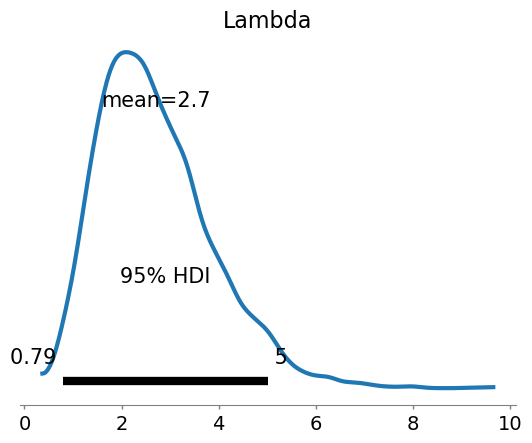

In [38]:
pm.plot_posterior(trace, linewidth=3, hdi_prob=0.95)

В качестве оценки Lambda можно взять ~2.1 как точку максимума плотности

Подсчет вероятности

In [32]:
lambda_samples = trace.posterior.Lambda.values.flatten()

probability = np.mean(lambda_samples >= 4)
print(f"Вероятность того, что в следующем матче голов будет не меньше {4}: {probability:.2f}")

Вероятность того, что в следующем матче голов будет не меньше 4: 0.13


2. Хотим посчитать количество медведей в лесу. Сначала поймали 23, поставили метку и отпустили. Через какое-то время поймали 19 медведей, из которых с меткой оказалось 4. Какое апостериорное распределение параметра &mdash; числа медведей?

  В качестве априорного используйте равномерное распределение на отрезке от 50 до 500

*Замечание:* https://en.wikipedia.org/wiki/Hypergeometric_distribution

Хотим оценить общее число медведей $A$ зная $B=23$ отмеченных медведей. Вероятность поймать среди $C=19$ медведей $D=4$ с меткой равна в точности событию $\xi = D$ для случайной величины распределенной как $\xi \sim Hypergeom(A, B, C)$. Несложно достроить апостериорное распределение

$$p(A | D) \sim p(D|A) p(A)$$

где $p(D|A) \sim Hypergeom(A, B, C), p(A) \sim apriori$

In [43]:
B = 23
C = 19
D = 4

with pm.Model() as model:
    N = pm.Uniform('N', lower=50, upper=500)
    
    likelihood = pm.HyperGeometric('likelihood', 
                                   N=N, 
                                   k=B, 
                                   n=C, 
                                   observed=D)
    
    trace = pm.sample(1000, tune=500, cores=4)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [N]


Output()

Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 1 seconds.


Статистики

In [44]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
N,173.873,89.105,56.67,356.217,2.617,2.582,1370.0,1251.0,1.0


Для разных цепей - все ок

array([[<Axes: title={'center': 'N'}>, <Axes: title={'center': 'N'}>]],
      dtype=object)

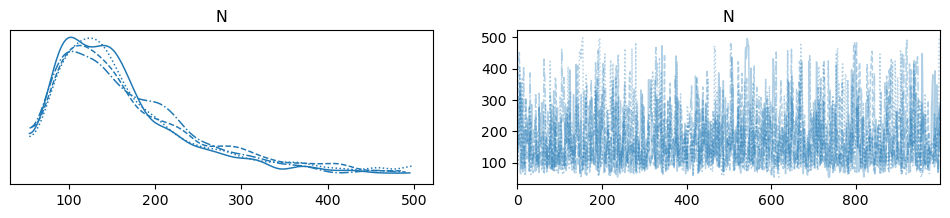

In [45]:
pm.plot_trace(trace)

Посмотрим на апостериорное распределение

<Axes: title={'center': 'N'}>

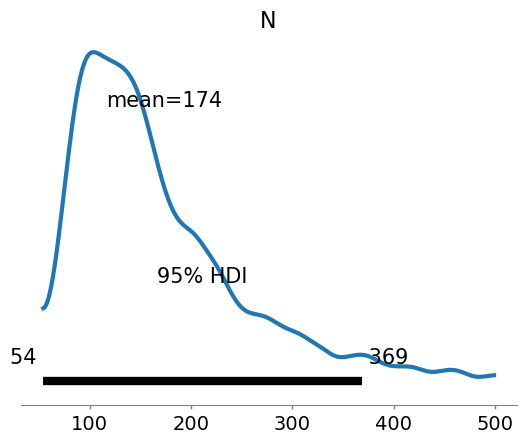

In [46]:
pm.plot_posterior(trace, linewidth=3, hdi_prob=0.95)

Можно оценить размер выборки медведей в ~110 опять из максимизации плотности

Итого, довольно простыми методами мы получаем оценку параметров.

----

### Задача 4.

На занятии мы посмотрели на зависимость апостериорной вероятности $\mathsf{P}(\theta_1 < \theta_2\ |\ X, Y)$ от истинного эффекта. Исследуйте, как эта вероятность меняется при изменении размера выборки. Начиная с какого размера выборки эта вероятность становится больше 80% при истинном относительном эффекте 5%?

Код с занятия

In [2]:
def bayesian_testing(
    prior_distr,
    sample_distr, shift_parameter,
    sample_x, sample_y,
    trace_size=2000, tune_size=500, cores_count=1,
    draw_trace=True, draw_posterior=True,
    returns=[]
    ):
    '''
    :param prior_distr: априорное распределение theta, функция со свободным параметром name
    :param sample_distr: распределение выборки, функция со свободными параметрами name, observed и параметром сдвига
    :param shift_parameter: название параметра сдвига из документации функции распределения (напр., 'mu')
    :param sample_x, sample_y: выборки двух групп
    :param trace_size, tune_size, cores_count: параметры генерации для PyMC
    :param draw_trace, draw_posterior: рисовать ли соответствующие графики
    :param returns: какие сгенерированные величины возвращать
    '''

    with pm.Model() as model:
        theta_1 = prior_distr('theta_1')
        theta_2 = prior_distr('theta_2')

        group1 = sample_distr('x', observed=sample_x, **{shift_parameter: theta_1})
        group2 = sample_distr('y', observed=sample_y, **{shift_parameter: theta_2})

        diff_of_means = pm.Deterministic('theta_1-theta_2', 
                                        theta_1 - theta_2)    
        real_of_means = pm.Deterministic('(theta_1-theta_2)/theta_2', 
                                        (theta_1 - theta_2)/theta_2)
        prob_h0 = pm.Deterministic('theta_1<theta_2', 
                                  theta_1<theta_2)

        trace = pm.sample(trace_size, tune=tune_size, cores=cores_count, progressbar=False)

        if draw_trace:
            pm.plot_trace(trace, var_names=['theta_1', 'theta_2']);

        if draw_posterior:
            pm.plot_posterior(
                trace, 
                var_names=['theta_1','theta_2', 'theta_1-theta_2', '(theta_1-theta_2)/theta_2', 'theta_1<theta_2'],
                hdi_prob=0.95,
                linewidth=5,
                figsize=(10, 5),
                textsize=12
            );

        return [trace.posterior[val].values.mean() for val in returns]

def generate_normal(size=1, loc=0, scale=1):
    return sps.norm(loc=loc, scale=scale).rvs(size)

Константы

In [5]:
size = 1000
loc = 100
scale = 5
effect = 0.05

Как меняется требуемый размер выборки если в реализации критерия использовать распределение Стьюдента? Используйте для этого первую реализацию критерия с занятия.

In [61]:
presample = generate_normal(size=size, loc=loc, scale=scale)
hist_loc = presample.mean()
hist_scale = np.sqrt(presample.var())

sample_sizes = np.arange(1, 25, step=2)
probs = []

for n in tqdm(sample_sizes):
    sample_x = generate_normal(size=n, loc=loc, scale=scale)
    sample_y = generate_normal(size=n, loc=loc, scale=scale)
    
    probs.append(bayesian_testing(
            prior_distr=partial(pm.Normal, mu=hist_loc, sigma=effect*hist_loc),
            sample_distr=partial(pm.Normal, sigma=hist_scale),
            shift_parameter='mu',
            sample_x=sample_x, 
            sample_y=sample_y * (1 + effect),
            draw_trace=False, draw_posterior=False,
            returns=['theta_1<theta_2']
        )[0])

  0%|          | 0/12 [00:00<?, ?it/s]

Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta_1, theta_2]
Sampling 2 chains for 500 tune and 2_000 draw iterations (1_000 + 4_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
  8%|▊         | 1/12 [00:07<01:23,  7.56s/it]Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta_1, theta_2]
Sampling 2 chains for 500 tune and 2_000 draw iterations (1_000 + 4_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
 17%|█▋        | 2/12 [00:12<01:02,  6.27s/it]Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta_1, theta_2]
Sampling 2 chains for 500 tune and 2_000 draw iterations (1_000 + 4_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
 25%|██▌

График

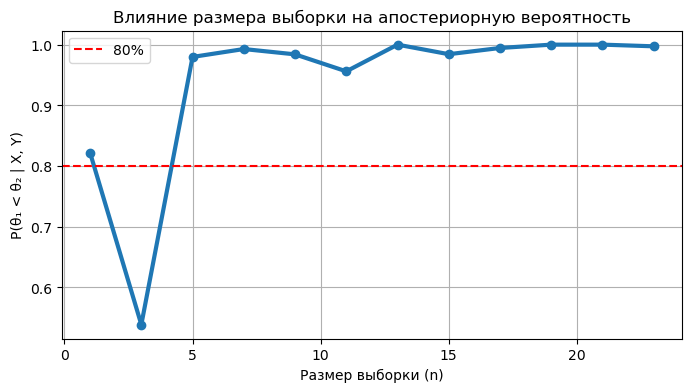

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(sample_sizes, probs, marker='o', lw=3)
plt.axhline(0.8, color='red', linestyle='--', label='80%')
plt.xlabel('Размер выборки (n)')
plt.ylabel('P($\\theta_1 < \\theta_2$ | X, Y)')
plt.title('Влияние размера выборки на апостериорную вероятность')
plt.legend()
plt.grid(True)
plt.show()

То есть достаточно совсем маленькой выборки при правильном априорие - **где то 5 элементов**

Исследуйте зависимость $\mathsf{P}(\theta_1 < \theta_2\ |\ X, Y)$ от истинного эффекта если данные сгенерированны из распределения Стьюдента, а критерий использует нормальное распределение.

Генерация выборок

In [3]:
def generate_student(size=1, loc=0, scale=1, df=3):
    return sps.t(df, loc=loc, scale=scale).rvs(size)

Рассчет

In [64]:
presample = generate_student(size=size, loc=loc, scale=scale)
hist_loc = presample.mean()
hist_scale = np.sqrt(presample.var())

sample_sizes = np.arange(1, 25, step=2)
probs = []

for n in tqdm(sample_sizes):
    sample_x = generate_student(size=n, loc=loc, scale=scale)
    sample_y = generate_student(size=n, loc=loc, scale=scale)
    
    probs.append(bayesian_testing(
            prior_distr=partial(pm.Normal, mu=hist_loc, sigma=effect*hist_loc),
            sample_distr=partial(pm.Normal, sigma=hist_scale),
            shift_parameter='mu',
            sample_x=sample_x, 
            sample_y=sample_y * (1 + effect),
            draw_trace=False, draw_posterior=False,
            returns=['theta_1<theta_2']
        )[0])

  0%|          | 0/12 [00:00<?, ?it/s]Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta_1, theta_2]
Sampling 2 chains for 500 tune and 2_000 draw iterations (1_000 + 4_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
  8%|▊         | 1/12 [00:07<01:21,  7.45s/it]Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta_1, theta_2]
Sampling 2 chains for 500 tune and 2_000 draw iterations (1_000 + 4_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
 17%|█▋        | 2/12 [00:12<01:02,  6.27s/it]Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta_1, theta_2]
Sampling 2 chains for 500 tune and 2_000 draw iterations (1_000 + 4_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computati

И график

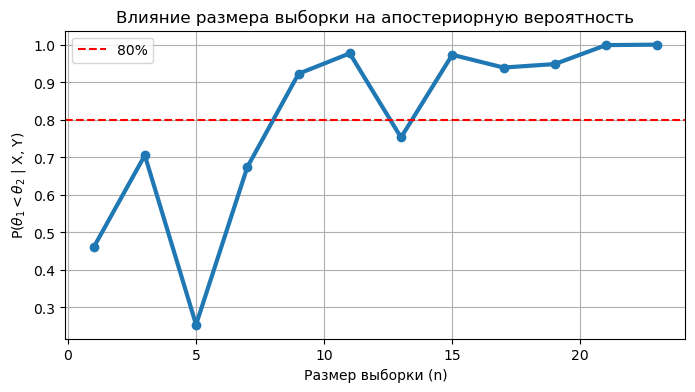

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(sample_sizes, probs, marker='o', lw=3)
plt.axhline(0.8, color='red', linestyle='--', label='80%')
plt.xlabel('Размер выборки (n)')
plt.ylabel('P($\\theta_1 < \\theta_2$ | X, Y)')
plt.title('Влияние размера выборки на апостериорную вероятность')
plt.legend()
plt.grid(True)
plt.show()

Тут уже нужно ~15 элементов выборки - **при нарушении нормальности у нас ухудшается сходимость**

И еще зависимость от эффекта

In [17]:
presample = generate_student(size=size, loc=loc, scale=scale)
hist_loc = presample.mean()
hist_scale = np.sqrt(presample.var())

effect_values = np.linspace(0, 0.05, 20)
probs = []

n = 10

for true_effect in tqdm(effect_values):
    sample_x = generate_student(size=n, loc=loc, scale=scale)
    sample_y = generate_student(size=n, loc=loc, scale=scale) + true_effect
    res = bayesian_testing(
        prior_distr=partial(pm.Normal, mu=hist_loc, sigma=effect*hist_loc),
        sample_distr=partial(pm.Normal, sigma=hist_scale),
        shift_parameter='mu',
        sample_x=sample_x, 
        sample_y=sample_y * (1 + effect),
        draw_trace=False, draw_posterior=False,
        cores_count=5,
        returns=['theta_1<theta_2']
    )
    probs.append(res[0])

  0%|          | 0/20 [00:00<?, ?it/s]Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 5 jobs)
NUTS: [theta_1, theta_2]
Sampling 5 chains for 500 tune and 2_000 draw iterations (2_500 + 10_000 draws total) took 2 seconds.
  5%|▌         | 1/20 [00:06<02:04,  6.55s/it]Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 5 jobs)
NUTS: [theta_1, theta_2]
Sampling 5 chains for 500 tune and 2_000 draw iterations (2_500 + 10_000 draws total) took 2 seconds.
 10%|█         | 2/20 [00:09<01:14,  4.15s/it]Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 5 jobs)
NUTS: [theta_1, theta_2]
Sampling 5 chains for 500 tune and 2_000 draw iterations (2_500 + 10_000 draws total) took 2 seconds.
 15%|█▌        | 3/20 [00:12<01:02,  3.69s/it]Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 5 jobs)
NUTS: [theta_1, theta_2]
Sampling 5 chains for 500 tune and 2_000 draw iterations (2_500 + 

И графики

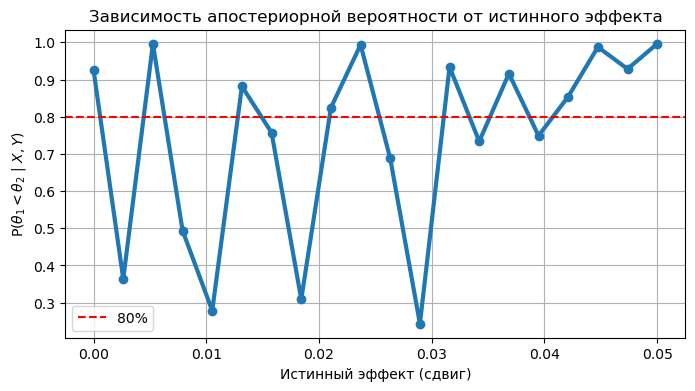

In [18]:
plt.figure(figsize=(8, 4))
plt.plot(effect_values, probs, marker='o', lw=3)
plt.axhline(0.8, color='red', linestyle='--', label='80%')
plt.xlabel('Истинный эффект (сдвиг)')
plt.ylabel('P($\\theta_1 < \\theta_2\\ |\\ X, Y$)')
plt.title('Зависимость апостериорной вероятности от истинного эффекта')
plt.legend()
plt.grid(True)
plt.show()

То есть опять, ожидаемо, хуже, чем было на семинаре с нормальным распределением. Чем хуже предположения подгоняют практику, тем хуже модель справляется с задачей

---
### Задача 5.

В Долгопрудном крупная торговая сеть имеет $100$ магазинов и планирует открыть еще $5$ магазинов. 

Первый этап &mdash; выбор места для открытия нового магазина среди множества потенциальных вариантов. Для этого аналитики компании построили ML-модель, которая на основе существующего множества магазинов предсказывает ожидаемую выручку магазина на основе различных географических факторов: плотность населения в некотором радиусе, величина пешеходного и транспортного потока, наличие рядом торговых центров и иных магазинов. Модель также оценивает степень уверенности в своем прогнозе.

Отлично, мы выбрали место для нового магазина, подготовились к окрытию и... открыли! Второй этап &mdash; оценка реальной успешности магазина. Но, поскольку магазин новый, он не сразу показывает ожидаемые значения выручки. В реальности выход магазина к ожидаемым показателям может занимать до 12-14 месяцев. Тем самым, такую оценку можно произвести в лучшем случае через год после открытия.

Тем не менее, спустя полгода работы можно прикинуть, достигнет ли магазин ожидаемых показателей. Если есть негативные опасения, то стоит проанализовать работу магазина. Возможно, его недостаточно прорекламировали, а может быть покупателям в нем что-то не понравилось.

Для составления прогноза на основе данных за каждый полгода можно спрогнозировать тренд роста выручки, а также можно использовать прогнозы ML-модели в качестве априорной информации. 

Предполагается, что тренд роста выручки магазина в первый год можно приближенно описать формулой
$$y_t = y_{\infty}\left[(1 - \gamma) \left( 1 - e^{-kt}\right) + \gamma\right] + \varepsilon_t,$$
где $y_{\infty}$ &mdash; ожидаемая выручка магазина в пределе, $\gamma \in (0, 1)$ &mdash; коэффициент выручки с первого месяца работы по отношению к предельному, $k \in [1/6, 1/4]$ &mdash; параметр формы кривой, $t$ &mdash; номер месяца с момента открытия (нумерация с 1), $\varepsilon_t$ &mdash; случайный шум. 

Подберите параметры априорного распределения выручки в пределе так, чтобы его математическое ожидание было равно ожидаемой выручке согласно ML-модели, а дисперсия опредялась степенью уверенности модели. Не берите слишком маленькую дисперсию, даже самое уверенное предсказание имеет погрешность не менее 10%. В качестве априорных распределений $\gamma$ и $k$ возьмите равномерные на соответствующей области значений. Априорное распределение шума выберите нормальным с нулевым средним и некоторой дисперсией, на которую тоже можно задать априорное распределение.

С помощью PyMC для каждого магазина постройте семплы из апостериорных распределений параметров $y_{\infty}, \gamma, k$. Далее по формуле тренда роста выручки получите семпл ожидаемой выручки через год после открытия для каждого магазина. Наконец, оцените вероятность того, что через год после открытия магазин достигнет уровня 80%, 90%, 100% от своей ожидаемой выручки.

In [69]:
# ожидаемая выручка согласно ML-модели
expected = [92700, 212800, 49700, 80000, 462500]
# степень уверенности ML-модели
confidence = [0.92, 0.96, 0.76, 0.62, 0.48]

data = pd.DataFrame(
    [[ 47580.07,  68817.26,  61583.18,  28341.77, 355656.42],
     [ 59487.94,  78042.15,  68282.65,  29684.57, 397649.98],
     [ 74656.72, 105193.11,  71588.68,  35201.27, 399673.09],
     [ 69145.22, 138103.96,  69242.53,  35444.95, 413788.36],
     [ 73360.78, 134696.74,  78585.76,  34829.87, 423585.50],
     [ 78408.82, 152144.24,  73533.09,  36262.02, 452980.44]],
    index=range(0, 6)
)
data.columns.name = 'shops'
data.index.name = 'months'

data

shops,0,1,2,3,4
months,,,,,
0,47580.07,68817.26,61583.18,28341.77,355656.42
1,59487.94,78042.15,68282.65,29684.57,397649.98
2,74656.72,105193.11,71588.68,35201.27,399673.09
3,69145.22,138103.96,69242.53,35444.95,413788.36
4,73360.78,134696.74,78585.76,34829.87,423585.50
5,78408.82,152144.24,73533.09,36262.02,452980.44


Вместо наращивания итераций алгоритма разумнее увеличить число самих цепей - при больших числах итераций появляются расхождения

In [ ]:
results = {}
for shop in range(5):
    monthes = np.array([0, 1, 2, 3, 4, 5])
    with pm.Model() as model:
        # Подогнали матожидание и дисперсию, но последняя не меньше 10%
        y_infty = pm.Normal('y_infty', mu=expected[shop],
                            sigma=max(expected[shop]/10, (1 - confidence[shop]) * expected[shop]))
        gamma = pm.Uniform('gamma', lower=0, upper=1)
        k = pm.Uniform('k', lower=1/6, upper=1/4)
        
        # дисперсия шума пропорциональна выручке
        sigma_obs = pm.HalfNormal('sigma_obs', sigma=y_infty * 0.05)
        # вектор, индексация месяцев с нуля, я не забыл, шум нормальный
        y_t = pm.Normal('y_t',
                        mu=y_infty * ((1 - gamma) * (1-pm.math.exp(-k*monthes)) + gamma),
        sigma=sigma_obs, observed=data[shop].values)
        
        trace = pm.sample(500, tune=400, target_accept=0.9, cores=30)
    
    y_12 = (trace.posterior['y_infty'] * ((1 - trace.posterior['gamma']) * (1 - np.exp(-trace.posterior['k'] * 12)) + trace.posterior['gamma'])).values.flatten()
    
    prob_80 = np.mean(y_12 >= 0.8 * expected[shop])
    prob_90 = np.mean(y_12 >= 0.9 * expected[shop])
    prob_100 = np.mean(y_12 >= 1.0 * expected[shop])
    
    results[shop] = {
        'trace': trace,
        'prob_80': prob_80,
        'prob_90': prob_90,
        'prob_100': prob_100,
        'y_12_median': np.mean(y_12),
        'y_12_std': np.std(y_12),
    }
        

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (30 chains in 30 jobs)
NUTS: [y_infty, gamma, k, sigma_obs]


Output()

Sampling 30 chains for 400 tune and 500 draw iterations (12_000 + 15_000 draws total) took 21 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (30 chains in 30 jobs)
NUTS: [y_infty, gamma, k, sigma_obs]


Output()

Sampling 30 chains for 400 tune and 500 draw iterations (12_000 + 15_000 draws total) took 23 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (30 chains in 30 jobs)
NUTS: [y_infty, gamma, k, sigma_obs]


Output()

Sampling 30 chains for 400 tune and 500 draw iterations (12_000 + 15_000 draws total) took 32 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (30 chains in 30 jobs)
NUTS: [y_infty, gamma, k, sigma_obs]


Output()

Sampling 30 chains for 400 tune and 500 draw iterations (12_000 + 15_000 draws total) took 32 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (30 chains in 30 jobs)
NUTS: [y_infty, gamma, k, sigma_obs]


Output()

Sampling 30 chains for 400 tune and 500 draw iterations (12_000 + 15_000 draws total) took 30 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.


Итого в виде таблички

In [89]:
rows = []
for shop, res in results.items():
    rows.append({
         'shop': shop,
         'prob_80': res['prob_80'],
         'prob_90': res['prob_90'],
         'prob_100': res['prob_100'],
         'y_12_median': res['y_12_median'],
         'y_12_std': res['y_12_std'],
         'expected': expected[shop],
         'confidence': confidence[shop]
    })
pd.set_option('display.precision', 2)
pd.DataFrame(rows)

,shop,prob_80,prob_90,prob_100,y_12_median,y_12_std,expected,confidence
0,0,1.00,0.93,0.29,90221.49,4755.40,92700,0.92
1,1,0.98,0.50,0.03,191669.55,10445.65,212800,0.96
2,2,1.00,1.00,1.00,77468.39,4056.09,49700,0.76
3,3,0.00,0.00,0.00,40478.98,2163.38,80000,0.62
4,4,1.00,1.00,0.85,477396.70,17113.88,462500,0.48


Получились хорошие оценки не самой простой задачи довольно простым алгоритмом. Кроме того, аккуратным подгоном параметров модели получилось добиться хорошей сходимости алгоритма. Как было сказано выше, лучше запустить больше цепочек, чем меньше, но длинных - из за риска расходимости (ее я и ловил)

По результатам магазинов:

0:  сильно уверенное предсказание модели и +- попадание чуть-чуть выше

1: сильно уверенное предсказание модели и +- попадание выше

2: сильно заниженное предсказание модели, +- уверенное

3: сильно завышенное предскакзние модели, +- уверенное

4: +- попадание предсказания модели и низкая уверенность

То есть мы отловили все случаи - что автор задачи и хотел